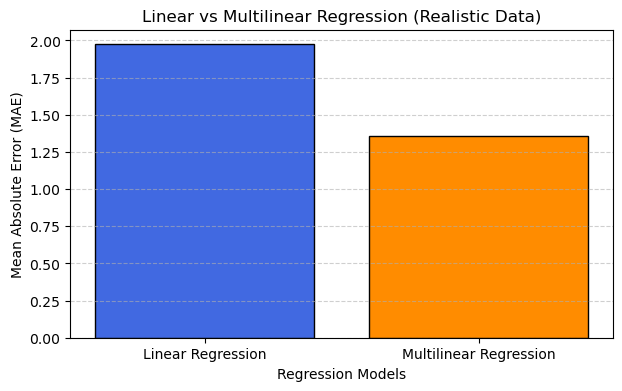

MODEL COMPARISON (MAE):

Linear Regression MAE: 1.97
Multilinear Regression MAE: 1.36


In [8]:
# REGRESSION MODELS

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Load realistic dataset
df = pd.read_csv("realistic_load_carriage_injury_dataset.csv")

# 2. Encode categorical features
categorical_cols = ['floor_condition', 'lighting', 'safety_gear']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Target variable
y = df['injury_severity']

# =================================================
# PART 1: SIMPLE LINEAR REGRESSION (ONE FEATURE)
# =================================================

# Use load_weight_kg as single independent variable
X_linear = df[['load_weight_kg']]

scaler_linear = StandardScaler()
X_linear_scaled = scaler_linear.fit_transform(X_linear)

Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    X_linear_scaled, y, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(Xl_train, yl_train)

y_pred_linear = linear_model.predict(Xl_test)
mae_linear = mean_absolute_error(yl_test, y_pred_linear)

# =================================================
# PART 2: MULTILINEAR REGRESSION (MULTIPLE FEATURES)
# =================================================

X_multi = df.drop(columns=['injury_severity'])

scaler_multi = StandardScaler()
X_multi_scaled = scaler_multi.fit_transform(X_multi)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_multi_scaled, y, test_size=0.2, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(Xm_train, ym_train)

y_pred_multi = multi_model.predict(Xm_test)
mae_multi = mean_absolute_error(ym_test, y_pred_multi)

# =================================================
# COMPARISON GRAPH 
# =================================================

models = ['Linear Regression', 'Multilinear Regression']
mae_scores = [mae_linear, mae_multi]
colors = ['royalblue', 'darkorange']

plt.figure(figsize=(7, 4))
plt.bar(models, mae_scores, color=colors, edgecolor='black')
plt.xlabel("Regression Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Linear vs Multilinear Regression (Realistic Data)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# =================================================
# PRINT RESULTS
# =================================================

print("MODEL COMPARISON (MAE):\n")
print(f"Linear Regression MAE: {mae_linear:.2f}")
print(f"Multilinear Regression MAE: {mae_multi:.2f}")


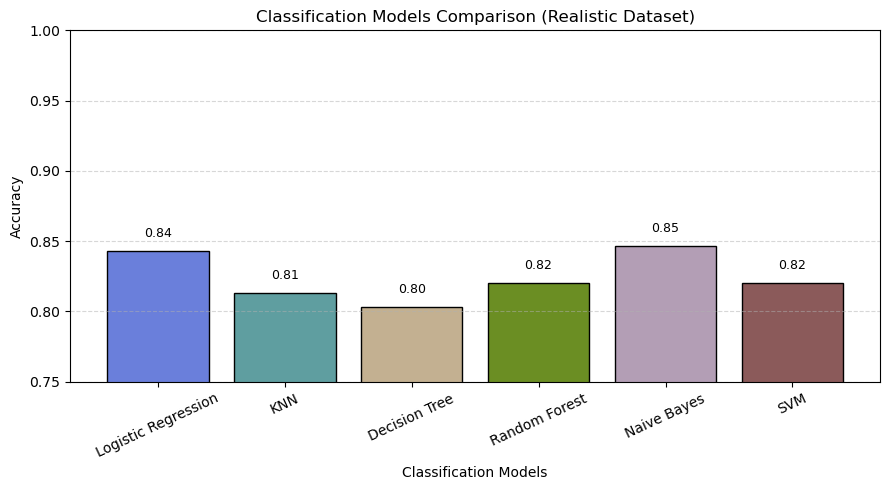

CLASSIFICATION RESULTS (Accuracy):

Logistic Regression: 0.84
KNN: 0.81
Decision Tree: 0.80
Random Forest: 0.82
Naive Bayes: 0.85
SVM: 0.82


In [11]:
# CLASSIFICATION MODELS COMPARISON

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# --------------------------------------------------
# 1. Load dataset
# --------------------------------------------------
df = pd.read_csv("realistic_load_carriage_injury_dataset.csv")

# --------------------------------------------------
# 2. Encode categorical features
# --------------------------------------------------
categorical_cols = ['floor_condition', 'lighting', 'safety_gear']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# --------------------------------------------------
# 3. Create classification target
# 0–4  -> No / Low Injury
# 5+   -> Injury
# --------------------------------------------------
df['injury_class'] = df['injury_severity'].apply(lambda x: 1 if x >= 5 else 0)

X = df.drop(columns=['injury_severity', 'injury_class'])
y = df['injury_class']

# --------------------------------------------------
# 4. Feature scaling
# --------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------
# 5. Train-test split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------------------------------------------
# 6. Classification models
# --------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

# --------------------------------------------------
# 7. Train and evaluate models
# --------------------------------------------------
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, preds)

# --------------------------------------------------
# 8. Plot comparison graph (taller bars)
# --------------------------------------------------
plt.figure(figsize=(9, 5))

bars = plt.bar(
    accuracy_scores.keys(),
    accuracy_scores.values(),
    color=[
        '#6A7FDB',  # muted blue
        '#5F9EA0',  # muted teal
        '#C3B091',  # muted khaki
        '#6B8E23',  # muted olive green
        '#B39EB5',  # muted lavender
        '#8B5A5A'   # muted maroon
    ],
    edgecolor='black'
)

plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Classification Models Comparison (Realistic Dataset)")

plt.ylim(0.75, 1.00)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=25)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 9. Print results
# --------------------------------------------------
print("CLASSIFICATION RESULTS (Accuracy):\n")
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc:.2f}")
